## IMDB reviews classifier.



Predict weather a "review" is a positive or negative.


dataset -> https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

### dependencies

In [1]:
# other
import pandas as pd
import re
import numpy as np

# visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 
from sklearn.model_selection import train_test_split


# NLP processing
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from nltk.corpus import stopwords


# Metrics
# from sklearn.metrics import f1_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
PATH = "D:\DataSets\IMDB reviews"

In [3]:
df = pd.read_csv(PATH + "\\IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# df['review'].iloc[0]

## simple data cleaning and preprocessing

In [7]:
# cheaking if the dataset contains any NULL's
df.isnull().values.any()

False

In [8]:
# cheacking for duplicated rows
df[df['review'].duplicated() == True]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [9]:
# droping duplicated tweets
df.drop_duplicates(subset = "review", keep = "first", inplace = True) 

In [10]:
df.shape

(49582, 2)

In [11]:
# quick look at one of the reviews
df['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [12]:
# custom function to preprocess a review 

def custom_standardization(corpus):
    # Remove html line-break tags
    corpus = corpus.replace("<br />","")
    # only keep alphanumeric characters
    corpus = re.sub("[^\w\s]", " ", corpus)
    # tokenize into words and convert all to lowercase
    tokens = word_tokenize(corpus.lower())
    # remove stopwords (“a”, “the”, “is”, “are” and etc)
    stop = stopwords.words('english')
    meaningful_words = [w for w in tokens if not w in stop]
    # apply stemming, removing word suffixes "flying" -> "fly"
    # join tokens back into corpus
    stemmer = SnowballStemmer('english')
    return ' '.join([stemmer.stem(w) for w in meaningful_words])

In [13]:
custom_standardization(df['review'].iloc[0])

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

As you can see, our corpus becomes quite a bit smaller, without losing any information.

<AxesSubplot:title={'center':'Sentiment labels'}, xlabel='sentiment', ylabel='count'>

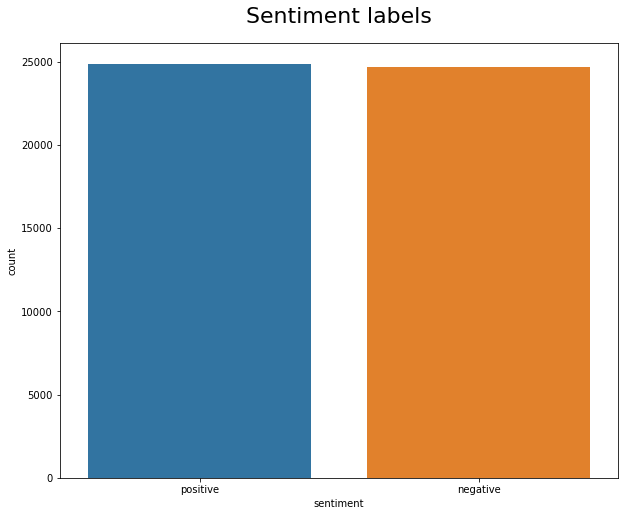

In [14]:
# ploting count of each label
plt.figure(figsize=(10, 8))
plt.title("Sentiment labels",fontsize=22, pad=20)
sns.countplot(x='sentiment', data=df)

Very nice, we do not have a imbalance to deal with. :)

### Word Clouds

Create a words cloud of from each sentiment to be able to better visualize it.

In [15]:
%%time
# separating each label
positive = df[df["sentiment"]=='positive']["review"]
negative = df[df["sentiment"]=='negative']["review"]

# combining reviews into single corpus
positive = ' '.join([word for word in positive.astype(str)])
negative = ' '.join([word for word in negative.astype(str)])

Wall time: 49.9 ms


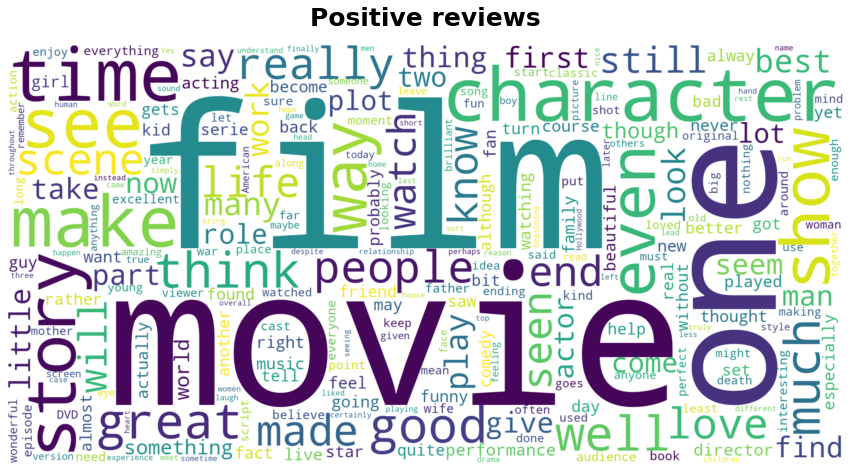

In [16]:
# wordcloud from positive reviews

# Generate word cloud
word_cloud = WordCloud(width=2000, height=1000, background_color="white",
                       max_words=250, min_word_length=3, stopwords=STOPWORDS).generate(positive)

# Generate plot
plt.figure(figsize=(15, 12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title('Positive reviews', fontsize=25, fontweight="bold",pad=20)
plt.axis('off')
plt.show()

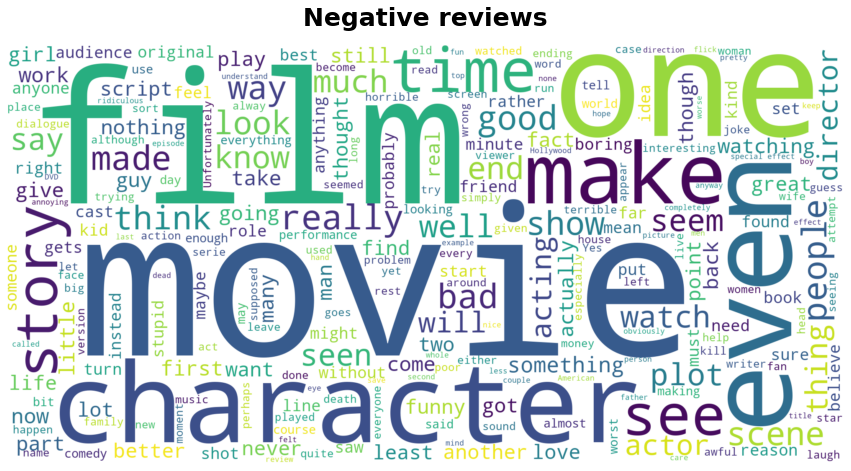

In [17]:
# wordcloud from negative reviews

# Generate word cloud
word_cloud = WordCloud(width=2000, height=1000, background_color="white",
                       max_words=250, min_word_length=3, stopwords=STOPWORDS).generate(negative)

# Generate plot
plt.figure(figsize=(15, 12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title('Negative reviews', fontsize=25, fontweight="bold", pad=20)
plt.axis('off')
plt.show()

With a brief overview of each cloud, to the human eyes they do not seem too different from each other. <br>
The important part will most likely be in what sequence the words are used.
Ok lets see if a machine can better make out the difference between each sentiment.

## Map sentiment to label

- 0 -> Negative
- 1 -> Positive

Here we will map each sentiment to a number, this is because our model works with numeric values and not words.

In [18]:
decode_map = {"negative": 0, "positive":1}

def encode_sentiment(sentiment):
    return decode_map[sentiment]

df['label'] = df['sentiment'].apply(lambda x: encode_sentiment(x))

In [19]:
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


## Splitting data

Splitting the dataset into 80% train data and 20% testing.

In [20]:
# Independent variable 
X = df['review']
# Dependent variable
y = df['label']

In [21]:
%%time
# split into train and test and randomly shuffle
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=12)

Wall time: 6.98 ms


In [22]:
# first index of train data
X_train.iloc[0]

'This movie starts out with an execution of a practitioner of witchcraft and his mistress. His head is chopped off and buried separately of his body...sounds like "The Thing that wouldn\'t die" doesn\'t it? Well it does play out a little like that, but once the body is reunited with the head, all the interesting and gruesome deaths are done and the movie moves very slowly. I mean the movie is only 88 minutes long and I kept thinking "When is it going to end"? The characters in the movie are idiots for the most part and they pretty much deserve to die for being really stupid. The villain is also very bad as he is slow moving and really you wonder how he manages to do anything considering he is afraid of jewelery. The only thing to keep you watching after the head is reattached is the fact that there are so many boobs being flashed that you really begin to lose track. Still I want to see a horror movie, not a soft core porn flick and as a horror movie it is way to slow moving with way to

In [23]:
# label for first index
y_train.iloc[0]

0

#### Standardization the data for model training

In [24]:
%%time
X_train = X_train.apply(custom_standardization)
X_test = X_test.apply(custom_standardization)

Wall time: 2min 8s


In [25]:
X_train.iloc[0]

'movi start execut practition witchcraft mistress head chop buri separ bodi sound like thing die well play littl like bodi reunit head interest gruesom death done movi move slowli mean movi 88 minut long kept think go end charact movi idiot part pretti much deserv die realli stupid villain also bad slow move realli wonder manag anyth consid afraid jeweleri thing keep watch head reattach fact mani boob flash realli begin lose track still want see horror movi soft core porn flick horror movi way slow move way mani slow stretch even somewhat enjoy read back box made like flesh eat zombi attack town small scene three four zombi attack hous easili repel factor movi scene rather pointless part say avoid movi unless come across realli cheap'

Now we will create a vocabulary of words and a number which will correspond to each word.
This is so we can create a sequence of numbers corresponding to the word in the review.
Because we are good data scientist's (copium), we will only build our vocabulary on your training data to prevent data leakage.

In [26]:
# creating an instance of tensorflow tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")
# fit on training data
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [27]:
count = 0
for x, y in word_index.items():
    if count == 5:
        break
    else:
        count += 1
        print(x+" = " + str(y))

<OOV> = 1
movi = 2
film = 3
one = 4
like = 5


In [28]:
# how many unqiue words are in our vocab
vocab_size = len(word_index)
vocab_size = 20000
len(word_index)

65621

In [29]:
# average amount of words in each review
round(X_train.str.split().str.len().mean())

120

Now lets convert each review from a sequence of words in to a sequence of numbers. This is because our model works in number and not characters.

In [30]:
""" here we set our max lentgh a review can be this means that 
    any review longer then this set amount will be cut off after reaching it 
    we will also apply padding to any review shorter then the amount"""
max_length = 150

In [31]:
def word_to_num(data):
    sequences = tokenizer.texts_to_sequences(data)
    # turncat and padding happen at the end
    padded = pad_sequences(sequences, maxlen=max_length, truncating="post",padding="post")
    return padded

In [32]:
%%time
X_train = word_to_num(X_train)
X_test = word_to_num(X_test)

Wall time: 3.06 s


In [33]:
# here we have a review transformed into a squence of ints corasponding to the word in tokenizer
X_train[0][:10]

array([    2,    85,   873, 13987,  6132,  3379,   255,  2456,  2359,
        1541])

Now we have our data ready for our model.

In [60]:
# defining our model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64,
                              input_length=max_length),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True,dropout=0.5)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    # to prevent overfitting
    tf.keras.layers.Dropout(0.5),
    # classification layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 64)           1280000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 150, 128)          66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,389,377
Trainable params: 1,389,377
Non-trainable params: 0
____________________________________________

In [63]:
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs,batch_size=512, validation_data=(X_test, y_test))

Epoch 1/10
78/78 [==============================] - 13s 96ms/step - loss: 0.6925 - accuracy: 0.5182 - val_loss: 0.6904 - val_accuracy: 0.5444
Epoch 2/10
78/78 [==============================] - 6s 79ms/step - loss: 0.6369 - accuracy: 0.6639 - val_loss: 0.4835 - val_accuracy: 0.8050
Epoch 3/10
78/78 [==============================] - 6s 77ms/step - loss: 0.4187 - accuracy: 0.8344 - val_loss: 0.3347 - val_accuracy: 0.8676
Epoch 4/10
78/78 [==============================] - 6s 77ms/step - loss: 0.3281 - accuracy: 0.8779 - val_loss: 0.3006 - val_accuracy: 0.8810
Epoch 5/10
78/78 [==============================] - 6s 77ms/step - loss: 0.2876 - accuracy: 0.8929 - val_loss: 0.2845 - val_accuracy: 0.8852
Epoch 6/10
78/78 [==============================] - 6s 80ms/step - loss: 0.2611 - accuracy: 0.9060 - val_loss: 0.2788 - val_accuracy: 0.8899
Epoch 7/10
78/78 [==============================] - 6s 79ms/step - loss: 0.2417 - accuracy: 0.9138 - val_loss: 0.2793 - val_accuracy: 0.8856
Epoch 8/10
7

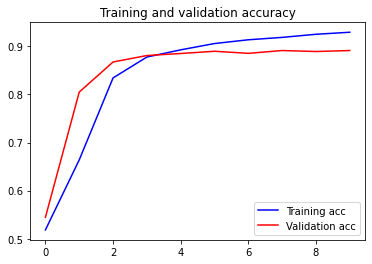

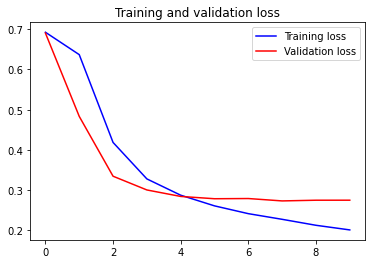

In [64]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))


plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [65]:
round(model.evaluate(X_test,y_test)[1] * 100,2)

310/310 [==============================] - 3s 9ms/step - loss: 0.2751 - accuracy: 0.8914


89.14

In [66]:
# predctions on whole test dataset
pred = model.predict(X_test).round()

In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4935
           1       0.89      0.89      0.89      4982

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



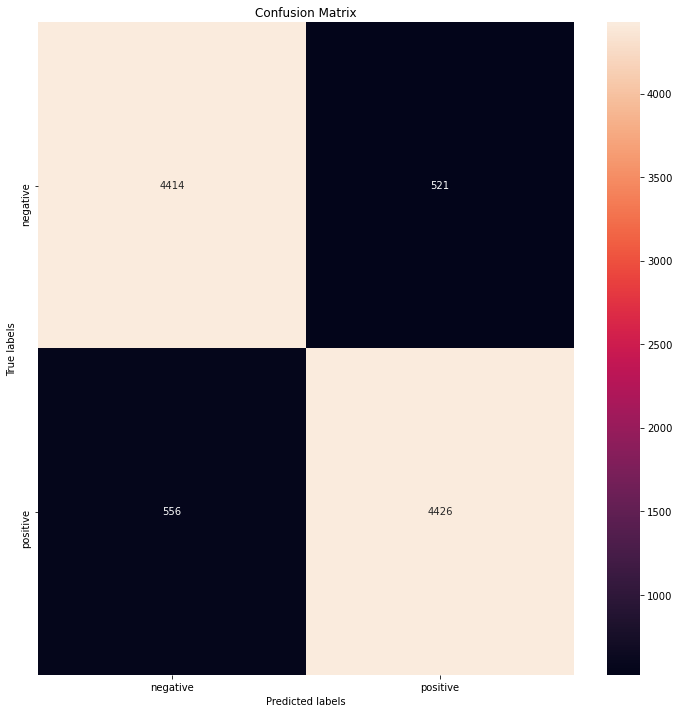

In [68]:
cm  = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,12))

# sns.set(font_scale=1.4) # for label size
# sns.heatmap(cm, annot=True, fmt='g')
# plt.show()


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [69]:
df.iloc[1]

review       A wonderful little production. <br /><br />The...
sentiment                                             positive
label                                                        1
Name: 1, dtype: object

In [70]:
positive_test = df.iloc[1]['review']
positive_test = word_to_num([custom_standardization(positive_test)])
confidence = round(model.predict(positive_test)[0][0] * 100,2)
print("{}% condident that this review is positive".format(confidence))

99.27% condident that this review is positive


In [71]:
negative_set = df[df['label']==0]
negative_set.iloc[0]

review       Basically there's a family where a little boy ...
sentiment                                             negative
label                                                        0
Name: 3, dtype: object

In [72]:
negative_test = negative_set.iloc[0]['review']
negative_test = word_to_num([custom_standardization(negative_test)])
confidence = round(model.predict(negative_test)[0][0] * 100,2)
print("{}% condident that this review is positive".format(confidence))

25.88% condident that this review is positive


In [73]:
def prediction(review, model=model):
    standardize = [custom_standardization(review)]
    sequence = word_to_num(standardize)

    confidence = round(model.predict(sequence)[0][0] * 100, 2)

    if confidence > 50.0:
        print("{}% condident that this review is positive".format(confidence))
    else:
        print("{}% condident that this review is negative".format(
            round(100 - confidence), 2))

In [74]:
review = "This must be the worst movie of all time."
review2 = "HOLY **** THIS IS THE BEST MOVIE TO BE EVER MADE"
review3 = "this movie is some what ok"

In [75]:
prediction(review)

84% condident that this review is negative


In [76]:
prediction(review2)

80.39% condident that this review is positive


In [77]:
prediction(review3)

50.82% condident that this review is positive
